# PREPARAZIONE DATI

In [2]:
import pickle
import os
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import umap.plot
from sklearn import metrics


In [3]:
source='/pickle'

In [4]:
source='/home/pietro/Scrivania/MLJC/TORUN/LatinBERT/pickle_gallus_related/'

In [5]:
data={}

In [6]:
def get_author(filename):
    pos1 = filename.find('_')
    return filename[:pos1]

authors=[]
for f in os.listdir(source):
    authors.append(get_author(f))
authors

['otto',
 'suger',
 'cosmas',
 'rupert',
 'abelard',
 'gallus',
 'guibert',
 'liutprand',
 'thietmar',
 'malaterra',
 'raoul',
 'malmesbury',
 'deExpAuth',
 'guibert',
 'galbert',
 'monachus',
 'otloh',
 'gfAuth',
 'malmesbury',
 'suger',
 'poitiers',
 'liutprand']

In [7]:
for author, file in zip(authors,os.listdir(source)):
    dbfile = open(source+'/'+file,'rb')     
    data[author]=pickle.load(dbfile)

In [8]:
len(data['otto'])

1589

In [9]:
data['otto'][2][1]

'[CLS] fateor , dum ante aliquot annos priorem hystoriam terminassem , spiritus -que peregrini dei ad sumenda contra gentes quae orientem inhabitant arma totam pene hesperiam afflasset , pro pacis iocunditate , quae orbi momentanee tunc arriserat , stilum vertere cogitaram , iam -que scribere coeperam , sed , quo instinctu nescio , tamquam animo futura presagiente finem -que inspiciente coeptum proieci opus . [SEP]'

In [43]:
#questo non so bene a che serva
for f in os.listdir('corpus0'):
    file=f
    nome=file.replace(" ", "_")
    os.rename(f,'corpus0/'+nome)

FileNotFoundError: [Errno 2] No such file or directory: 'abelard consol.txt' -> '/home/wsojka00/Desktop/LatinBERT/corpus0/abelard_consol.txt'

In [10]:
#voglio una funzione che raggruppi insieme i token degli autori che voglio analizzare
def function(listauthor):
    token=[]
    auth=[]
    for author in listauthor:
        for key in data[author]:
            token.append(data[author][key][2])
            auth.append(author)
    token=np.array(token)
    auth=np.array(auth)
    return token,auth

In [7]:
listauthor=authors

X,auth=function(['abelard', 'gfAuth', 'liutprand', 'malmesbury', 'monachus', 'otto', 'poitiers', 'raoul', 
                 'rupert', 'malmesbury','otloh', 'suger', 
                 'thietmar', 'galbert'])

In [18]:
gallus,_=function(['gallus'])

In [19]:
gallus.shape

(1330, 768)

In [8]:
X.shape,auth.shape

((24201, 768), (24201,))

In [11]:
listauthor=['monachus','gallus']

X,auth=function(listauthor)
X.shape

(1858, 768)

In [23]:
listauthor=authors
X,auth=function(listauthor)
X.shape

(37101, 768)

In [14]:
cos=metrics.pairwise.cosine_similarity(X)

In [19]:
euc=metrics.pairwise.euclidean_distances(X)

In [22]:
euc.min()

0.0

<AxesSubplot:>

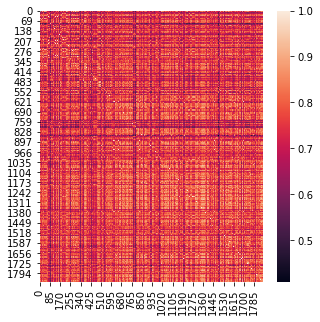

In [23]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cos)

# Visualization with UMAP

In [19]:
mapper = umap.UMAP(n_components=2,metric='euclidean', n_neighbors=100,min_dist=0.05).fit(X)

umap.plot.points(mapper, labels=np.array(auth))

<AxesSubplot:>

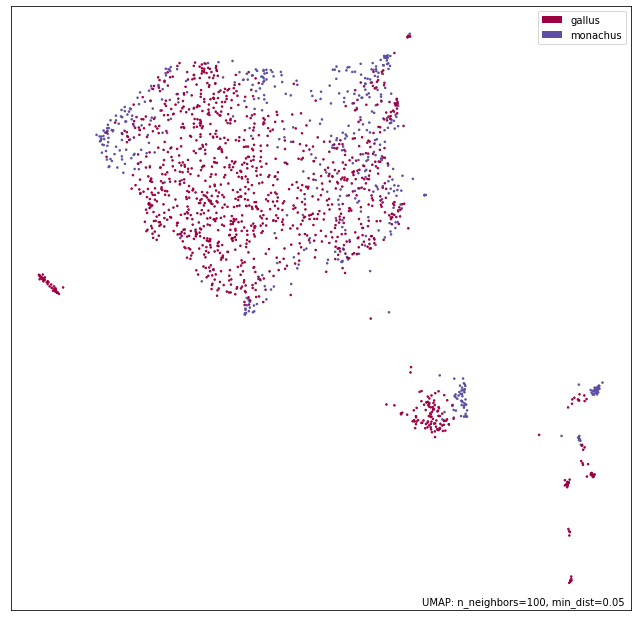

In [20]:
umap.plot.points(mapper, labels=np.array(auth))

In [ ]:
mapper = umap.UMAP(n_components=2,metric='mahalanobis', n_neighbors=100,min_dist=0.1).fit(X)
umap.plot.points(mapper, labels=np.array(auth))

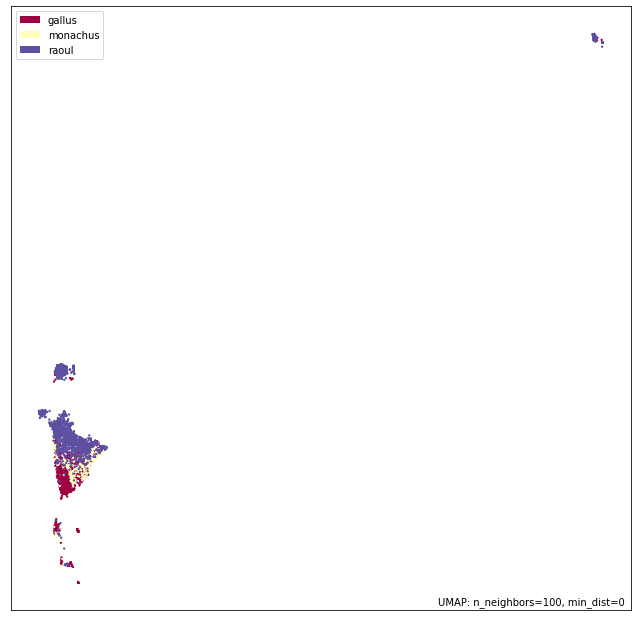

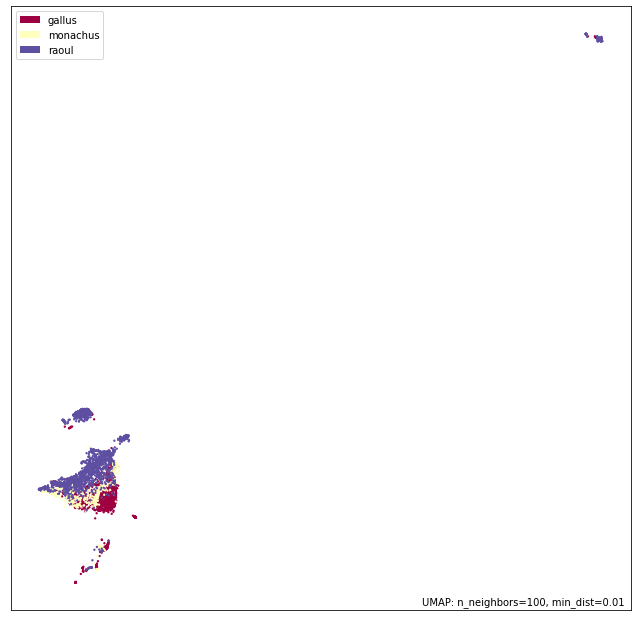

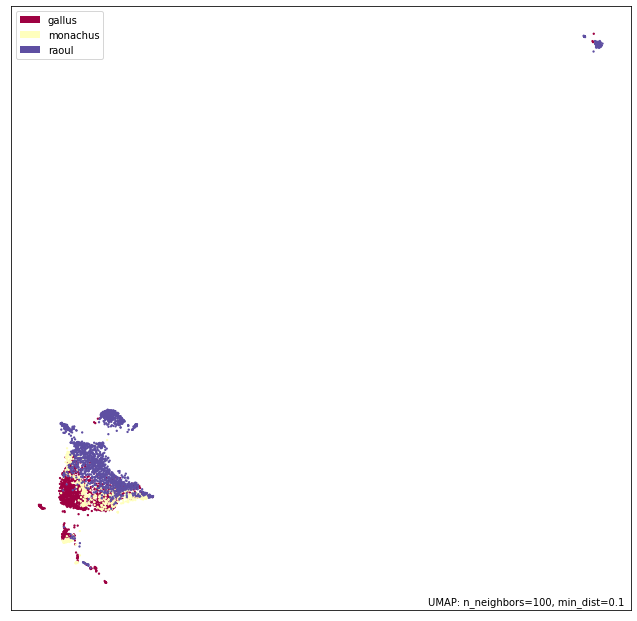

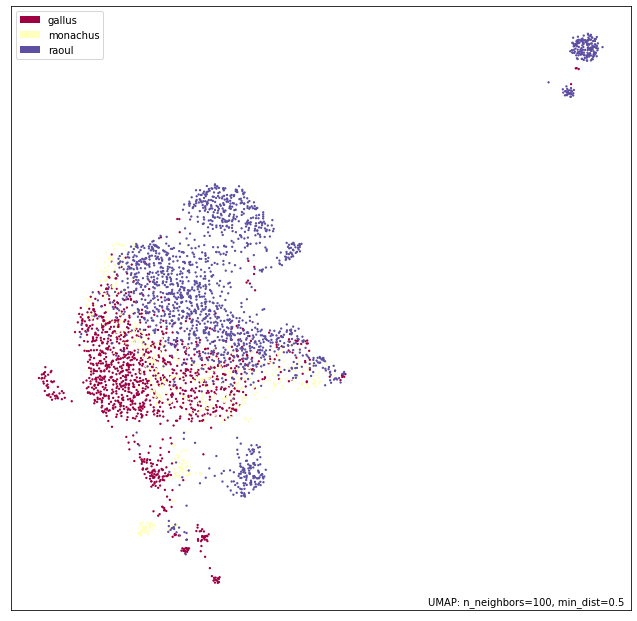

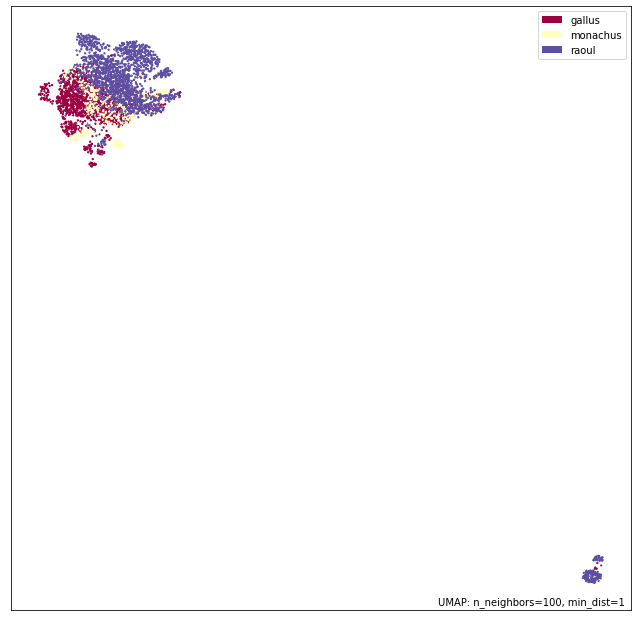

In [9]:
neighbours=[100]
distances=[0,0.01,0.1,0.5,1]

for neighbour in neighbours:
    for dist in distances:
        mapper = umap.UMAP(n_components=2,metric='euclidean', n_neighbors=neighbour,min_dist=dist).fit(X)
        umap.plot.points(mapper, labels=auth)